# IO

In [1]:
from PineBioML import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 2: read multiple files
x, y = IO.read_multiple_groups(
    file_path_list=[
        input_folder+ "example_group1.csv", # all samples from this file will have y = 0, because it is in the 1st place of the file path list.
        input_folder+ "example_group2.tsv", # all samples from this file will have y = 1, because it is in the 2nd place of the file path list.
    ],
    index_col=0
    )

In [4]:
x.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,-0.046497,-0.936589,0.831728,0.676612,1.089821,1.182193,0.057498,1.087513,0.916977,1.366645,...,-0.906979,0.557050,-0.052619,-0.777292,1.332989,0.586623,0.755015,0.568341,0.557208,-0.301866
1,1.375768,2.982642,0.828336,0.331314,0.780520,0.077063,-0.180034,0.720076,-0.293831,1.130501,...,1.706683,0.370087,-1.770032,1.021724,-1.395205,1.358890,-0.242389,-1.181098,-1.395800,-1.978847
2,0.513176,-0.237153,0.403565,0.340722,-0.969333,1.181883,-1.853352,0.954555,0.102275,-0.966393,...,-0.287969,0.243530,-0.684112,0.179854,-1.024727,0.962608,-0.246234,-1.125735,-1.121738,-0.757847
3,-0.113984,0.570842,-1.447456,0.478515,-1.063417,-0.928786,-0.903156,-0.163331,-0.231151,0.136662,...,-0.299377,1.624747,0.046088,-0.585543,-2.059056,-0.872338,-0.491621,-0.383596,1.557598,-0.923839
4,1.338395,1.014111,-0.231040,0.188683,1.030870,0.233220,1.318331,-1.253098,-2.084681,0.360878,...,-0.284378,-0.145813,-0.264684,0.399323,0.629979,0.410857,-1.790606,-0.511627,0.539162,1.026244


In [5]:
y.value_counts()

0.0    100
1.0    100
Name: count, dtype: int64

# Preprocessing

In [6]:
from PineBioML.preprocessing import Normalizer

x = Normalizer(method="StandardScaler").fit_transform(x)

In [7]:
# Impute 0
from PineBioML.preprocessing import impute

# The imputer will drop the features with missing value more than 60%.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.6, strategy = "constant")
x = simple.fit_transform(x)

# Data overview

In [8]:
import PineBioML.report.utils as report_utils

In [9]:
from sklearn.preprocessing import LabelEncoder
from pandas import Series

# turn y into a regression problem
y = Series(LabelEncoder().fit_transform(y), index = y.index, name = y.name)

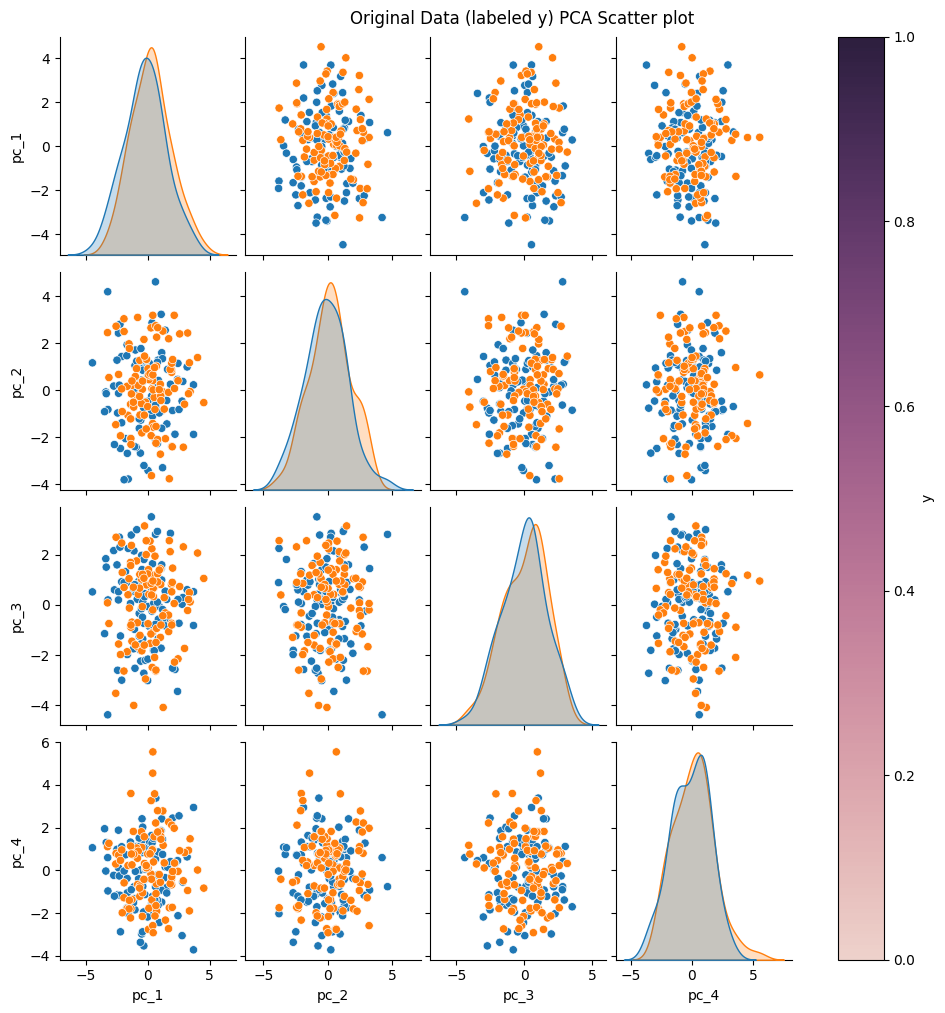

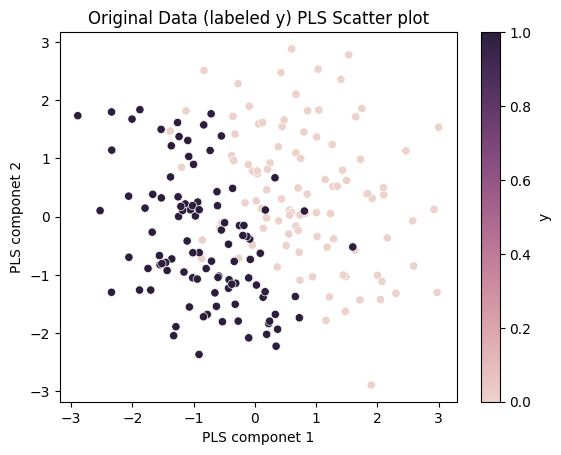

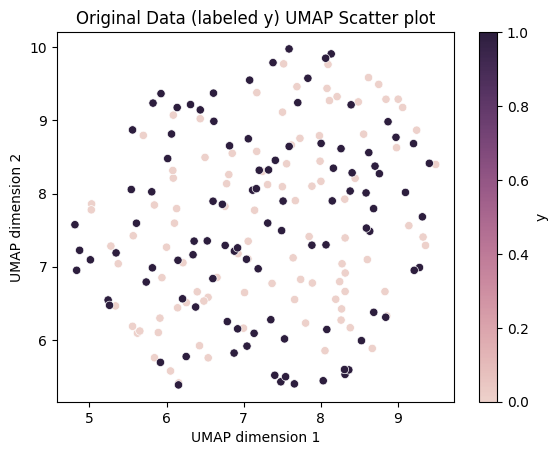

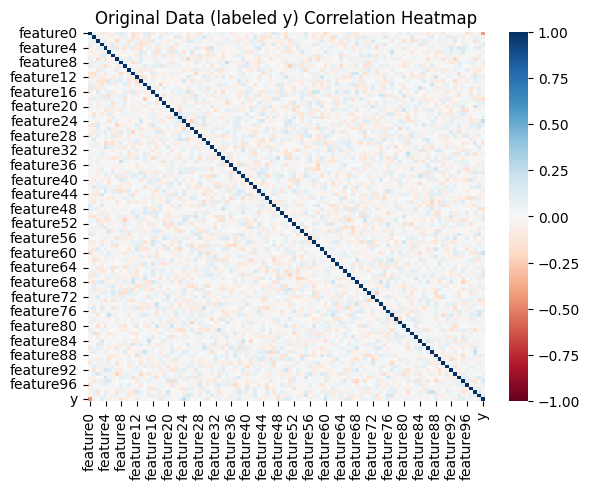

In [11]:
report_utils.data_overview(x, y, is_classification=False, discrete_legend=False, prefix="Original Data (labeled y)", save_fig=True, save_path="./output/images/", show_fig=True)

# Feature selection

In [12]:
from PineBioML.selection.regression import essemble_selector

In [13]:
# Use several way to select top-k important features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
ensemble_selector = essemble_selector(k = 5)
x = ensemble_selector.fit_transform(x, y) # if k = -1, it returns all the feature scores

Using  RF_gini  to select.
RF_gini  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  AdaBoost  to select.
AdaBoost  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
Lightgbm  is done.



In [14]:
importance = ensemble_selector.what_matters()
importance

,RandomForest_squared_error,LassoLinear,multi_Lasso,SVM,AdaBoost128,XGboost,Lightgbm
feature0,0.236707,0.564484,0.092477,1.0,0.307462,NaN,94.0
feature47,0.033216,NaN,NaN,NaN,0.048071,NaN,NaN
feature18,0.027529,NaN,NaN,NaN,NaN,0.046226,25.0
feature5,0.026741,NaN,NaN,NaN,0.031498,NaN,NaN
feature24,0.025891,NaN,NaN,NaN,NaN,NaN,NaN
feature63,NaN,0.564484,0.092477,1.0,NaN,NaN,NaN
feature73,NaN,0.564484,NaN,1.0,NaN,NaN,NaN
feature72,NaN,0.564484,NaN,1.0,NaN,NaN,NaN
feature71,NaN,0.564484,NaN,1.0,NaN,NaN,NaN
feature1,NaN,NaN,0.034214,NaN,NaN,NaN,NaN


### Choosing the top-5 feature to build models

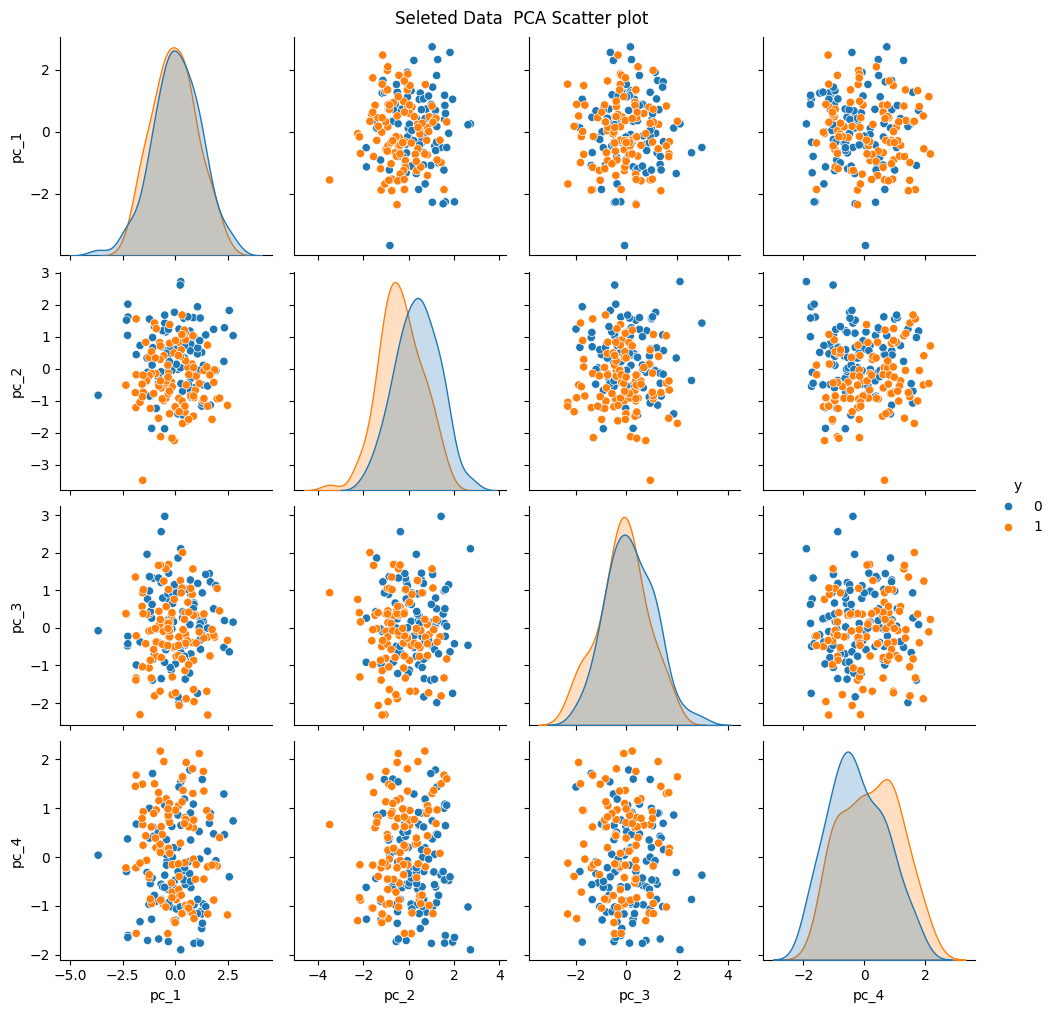

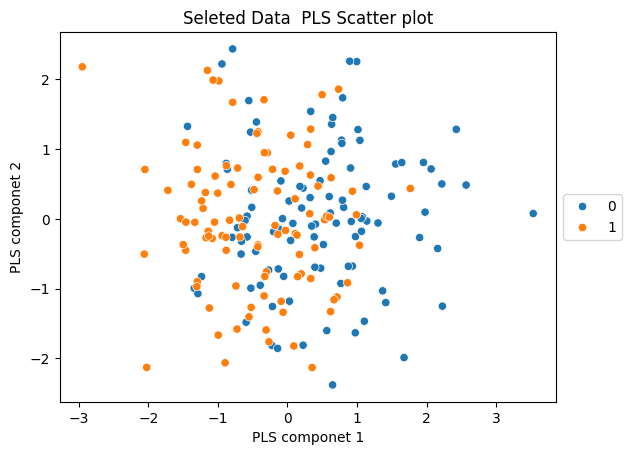

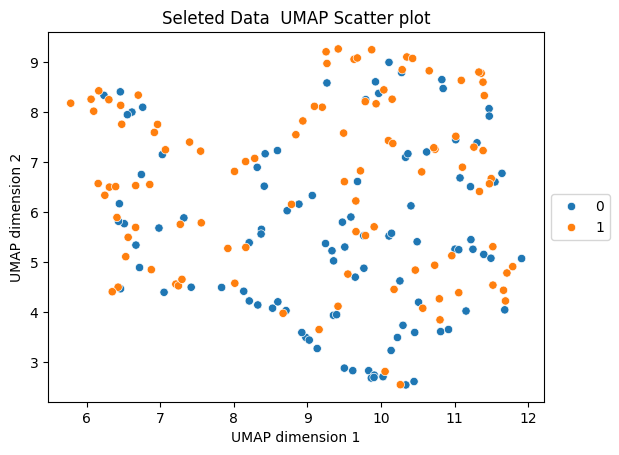

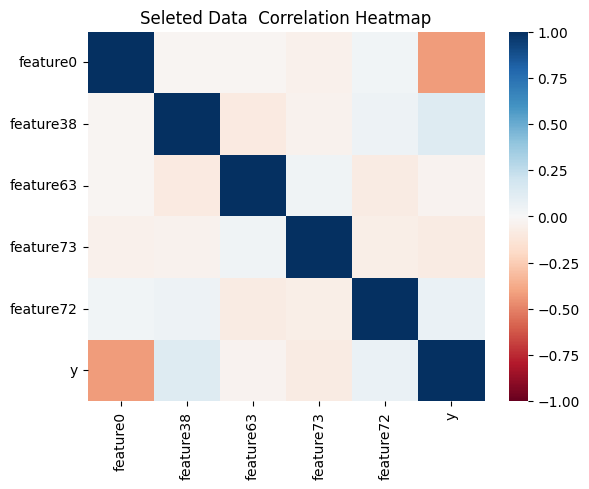

In [15]:
# Overviewing the top-5 features.
report_utils.data_overview(x, y, is_classification=True, prefix="Seleted Data ", save_fig=True, save_path="./output/images/", show_fig=True)

# Modeling

### Train test split

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True, stratify=y)

### Tuning a model

optuna seed 333  |  validation seed 2222  |  model seed 11
    start tuning. it will take a while.
    optuna is better, best trial:  11

 rf  performance:
    r2     : 0.434
    rmse   : 0.248
    mae    : 0.395
    support: 66.000


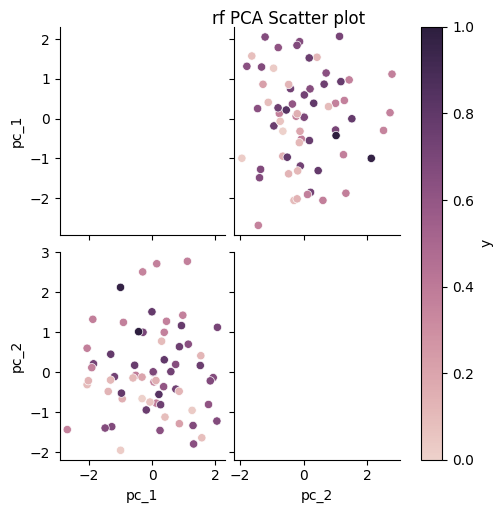

In [17]:
import PineBioML.model.supervised.Regression as tuner

rf = tuner.RandomForest_tuner(target="mse", kernel_seed=11, valid_seed = 2222, optuna_seed = 333).fit(x_train, y_train)
report_utils.regression_summary(x_valid, y_valid, rf.predict(x_valid), prefix="rf")

# Output

In [18]:
# Save the result ro output_path
importance.to_csv(output_folder+export_title+ " importance.csv")

In [19]:
from PineBioML.IO import save_model
# save model
save_model(rf, save_path=output_folder+"models/", save_name=export_title+"RandomForest", overide=False)

example_basic RandomForest  has already exist in  ./output/models/
please choose another model save_name or set overide to True which will replace the existing one


# Reload model


 rf  performance:
    r2     : 0.434
    rmse   : 0.248
    mae    : 0.395
    support: 66.000


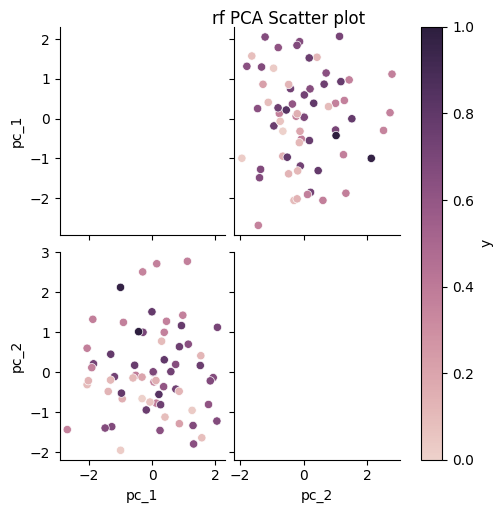

In [20]:
from PineBioML.IO import load_model
# load model
presaved_model = load_model(output_folder+"models/", export_title+"RandomForest")
report_utils.regression_summary(x_valid, y_valid, rf.predict(x_valid), prefix="rf")